In [2]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [3]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

## Dataset info

In [7]:
bc.target.shape

(569,)

In [12]:
bc.data.shape

(569, 30)

## Preprocessing

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size= 0.2)

In [18]:
print(f"Feuture ==> train : {X_train.shape} - test: {X_test.shape}")
print(f"Label ==> train : {y_train.shape} - test: {y_test.shape}")

Feuture ==> train : (455, 30) - test: (114, 30)
Label ==> train : (455,) - test: (114,)


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Classification

In [26]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix, accuracy_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred= y_pred_train)
    acc_test = accuracy_score(y_true= y_test, y_pred= y_pred_test)

    
    p = precision_score(y_test, y_pred_test)

    
    r = recall_score(y_test, y_pred_test)

    mat_test = confusion_matrix(y_test , y_pred_test)

    print(f"acc train = {acc_train} \n acc test = {acc_test} \n Precision score test = {p} \n Recall test = {r} \n Confusion Matrix Test = \n {mat_test}")

    return acc_train, acc_test, p, r, mat_test


### 1. Naive bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb, mat_test_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc train = 0.9406593406593406 
 acc test = 0.956140350877193 
 Precision score test = 0.9436619718309859 
 Recall test = 0.9852941176470589 
 Confusion Matrix Test = 
 [[42  4]
 [ 1 67]]


### 2. KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 8 , algorithm='kd_tree' , leaf_size= 28 )
knn. fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [30]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn, mat_test_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc train = 0.9824175824175824 
 acc test = 0.9649122807017544 
 Precision score test = 0.9705882352941176 
 Recall test = 0.9705882352941176 
 Confusion Matrix Test = 
 [[44  2]
 [ 2 66]]


### 3. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth= 64, min_samples_split= 2, criterion= 'gini')

dt.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=64)

In [34]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt, mat_test_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc train = 1.0 
 acc test = 0.9649122807017544 
 Precision score test = 0.9848484848484849 
 Recall test = 0.9558823529411765 
 Confusion Matrix Test = 
 [[45  1]
 [ 3 65]]


### 4. Random Forest 

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 1000, max_depth= 32, min_samples_split= 4)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=32, min_samples_split=4, n_estimators=1000)

In [38]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf, mat_test_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc train = 1.0 
 acc test = 0.9736842105263158 
 Precision score test = 0.9710144927536232 
 Recall test = 0.9852941176470589 
 Confusion Matrix Test = 
 [[44  2]
 [ 1 67]]


### 5. SVM

In [41]:
from sklearn.svm import SVC

svm = SVC(kernel= 'poly')
svm.fit(X_train, y_train)

SVC(kernel='poly')

In [42]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm, mat_test_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc train = 0.989010989010989 
 acc test = 0.9824561403508771 
 Precision score test = 0.9714285714285714 
 Recall test = 1.0 
 Confusion Matrix Test = 
 [[44  2]
 [ 0 68]]


### 6. Logistic Regression 

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)


LogisticRegression()

In [44]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

acc_train_lr, acc_test_lr, p_lr, r_lr, mat_test_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc train = 0.9714285714285714 
 acc test = 0.9649122807017544 
 Precision score test = 0.9444444444444444 
 Recall test = 1.0 
 Confusion Matrix Test = 
 [[42  4]
 [ 0 68]]


### 7. ANN

In [56]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes= 256, activation='relu', solver='adam', batch_size= 8)

ann.fit(X_train, y_train)

MLPClassifier(batch_size=8, hidden_layer_sizes=256)

In [57]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann, mat_test_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc train = 0.9934065934065934 
 acc test = 0.9736842105263158 
 Precision score test = 0.9577464788732394 
 Recall test = 1.0 
 Confusion Matrix Test = 
 [[43  3]
 [ 0 68]]


## Comparison

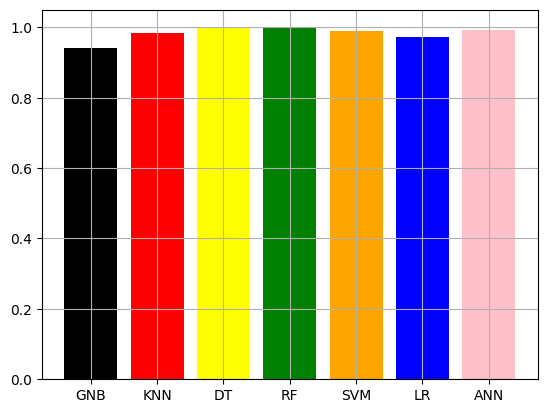

In [60]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["GNB" , "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["black", "red", "yellow", "green", "orange", "blue", "pink"]
plt.bar(title, acc_train, color = colors)
plt.grid()
plt.show()

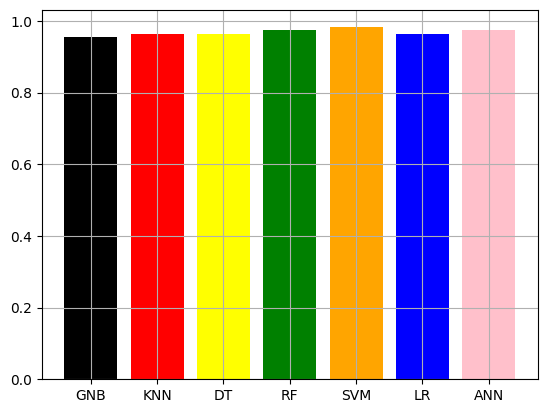

In [61]:

acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ["GNB" , "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["black", "red", "yellow", "green", "orange", "blue", "pink"]
plt.bar(title, acc_test, color = colors)
plt.grid()
plt.show()

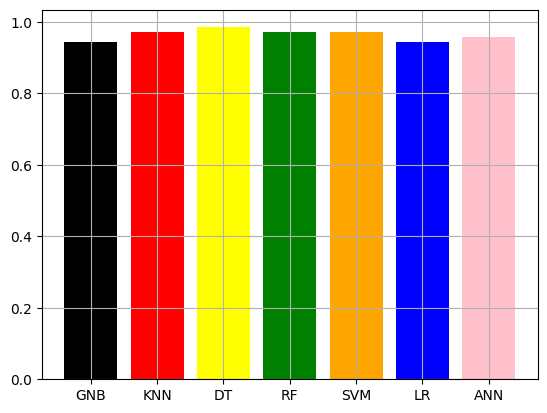

In [63]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ["GNB" , "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["black", "red", "yellow", "green", "orange", "blue", "pink"]
plt.bar(title, p, color = colors)
plt.grid()
plt.show()

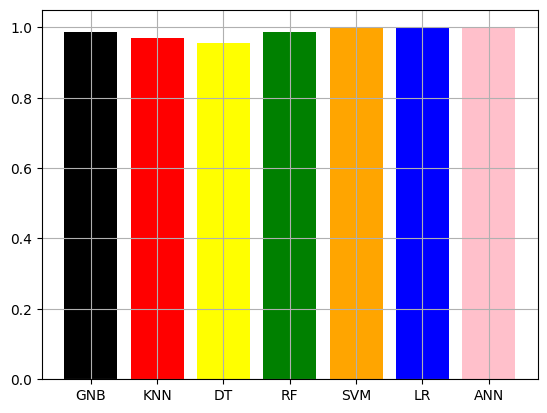

In [64]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ["GNB" , "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["black", "red", "yellow", "green", "orange", "blue", "pink"]
plt.bar(title, r, color = colors)
plt.grid()
plt.show()